POLYNOMIAL REGRESSION: EXTENDING LINEAR MODELS WITH BASIS FUNCTIONS

- A diferencia de la regresion linear, el modelo aprende a realizar curvas predictorias añadiendo potencias de x

- Esta regresion captura relaciones no lineales sin abandonar la sencillez de la regresion lineal.

- Cuidado con sobre ajustar el modelo de forma que tambien siga el ruido

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

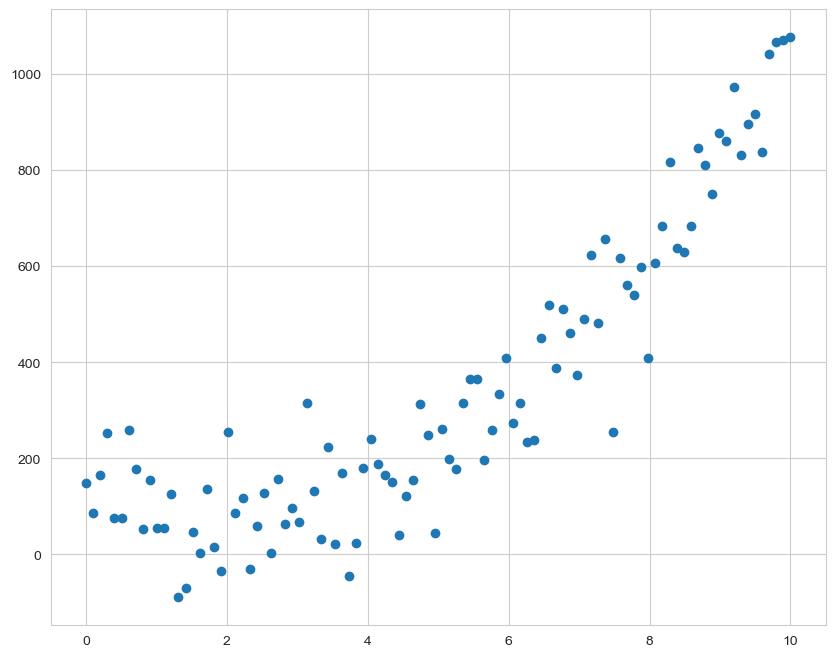

In [2]:
# Fijamos la semilla del generador de numeros aleatorios, de forma que estableciendo esto tendremos siempre los mismos datos
np.random.seed(42)
# Establecemos el numero de puntos que queremos generar (100)
n_samples = 100

x = np.linspace(0, 10, 100)
rng = np.random.randn(n_samples) * 100

y = x ** 3 + rng * 100

plt.figure(figsize = (10, 8))
plt.scatter(x, y)

LINEAR REGRESSION

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

Coeficiente estimado:  [91.68031643]


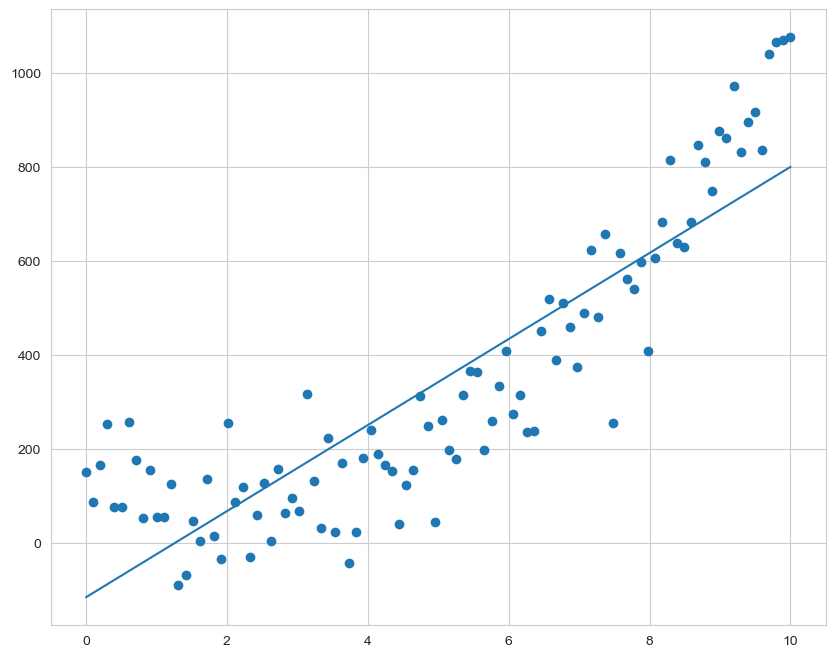

In [8]:
# Creamos y ajustamos el modelo
lr = LinearRegression()
lr.fit(x.reshape(-1, 1), y)
# Tenemos un array, asi que para que sklearn lo interprete bien lo pasamos a matriz
model_pred = lr.predict(x.reshape(-1, 1))

plt.figure(figsize = (10, 8))
plt.scatter(x, y)
plt.plot(x, model_pred)
print("Coeficiente estimado: ", lr.coef_)

Con la regresion linear, obtenemos una linea recta que intenta ajustarse a los resultados obtenidos, el problema es que la relacion de x e y no es lineal, de forma
que en los extremos la prediccion tiende a aumentar de error, en este caso cuanto mayor en la x mas margen de error se maneja.

Por eso necesitamos un modelo que aprenda con curvas, usamos la regresion polinomica.

In [9]:
from sklearn.preprocessing import PolynomialFeatures

In [14]:
# Creamos el modelo polinomico indicado que sera x^2
poly_reg = PolynomialFeatures(degree = 2)
# Creamos una matriz en la que cada fila es [1, x, x^2]
x_poly = poly_reg.fit_transform(x.reshape(-1, 1))

In [18]:
lin_reg_2 = LinearRegression()
# Entrenamos el modelo con los datos modificados, de forma que los coeficientes son los mismos pero la prediccion ahora es una parabola.
lin_reg_2.fit(x_poly, y)
# Generamos la linea (parabola) ajustada a los datos
y_pred = lin_reg_2.predict(x_poly)            

0.9173858308909386


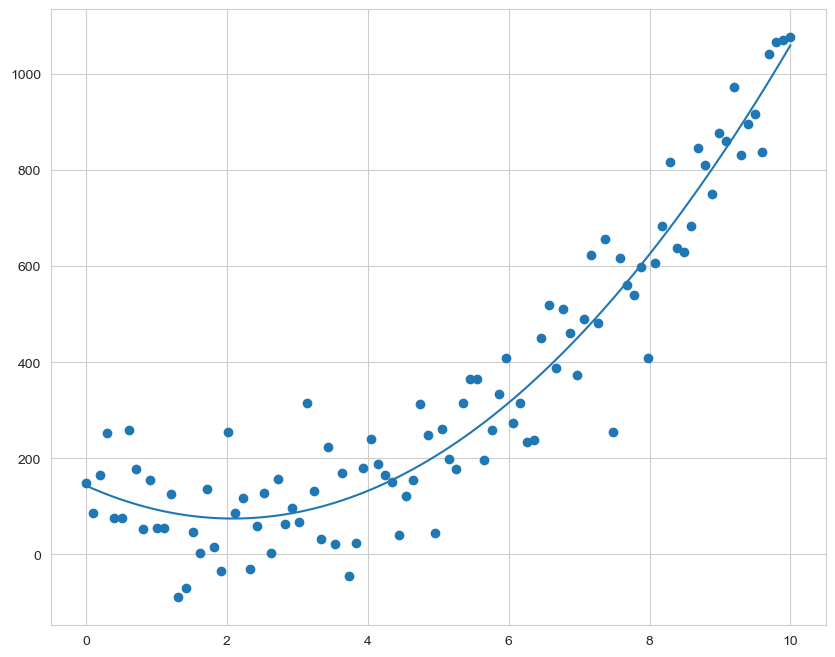

In [19]:
plt.figure(figsize = (10, 8))
plt.scatter(x, y)
plt.plot(x, y_pred)
# Comprobamos el coeficiente del modelo de regresion polinomica
print(r2_score(y, y_pred))

HACER CON LOS DATOS QUE TENEMOS DE LAS CASAS DE BOSTON, TANTO LA REGRESION LINEAL, LA CUADRATICA Y LA CUBICA